<html>
    <head>
<span style="font-family: Algerian; color:green;font-size:30px;">
    <center><b><u>
        YOUTUBE PROJECT </u></b>
    </center>
    </span>
        </head>
    </html>
        



<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
         1. Import required libraries and read the provided dataset (youtube_dislike_dataset.csv)          and retrieve top5 and bottom 5 records.</i></b>
    </center>
</span>
    </html>

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer

In [2]:
# Read the provided dataset (youtube_dislike_dataset.csv) and retrieve top 5

df = pd.read_csv('youtube_dislike_dataset.csv')
print("\nThe TOP 5 record in Dataset:\n")
df.head()


The TOP 5 record in Dataset:



,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...


In [3]:
# Retrieve bottom 5

print("The Bottom 5 record in Dataset:\n")
df.tail()

The Bottom 5 record in Dataset:



,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",'DESTINED 2 WIN' OUT NOW !! https://liltjay.ln...
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,I honestly do not know why this song hit so ha...
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,Foi um prazer passar esta tarde com vocs debat...
37421,zzxPZwaA-8w,Gareth Bale brace secures dramatic comeback on...,UCEg25rdRZXg32iwai6N6l0w,Tottenham Hotspur,2021-05-23 21:00:31,2252090,34063,868,2004,Spurs Tottenham Hotspur Tottenham Leicester ...,Two minute highlights from Tottenham Hotspur's...,Thank you Kane for everything you have given t...


<html>
    <head>
    <style>
            ul.b{list-style-type: lower-alpha;}
    </style>
    </head>
    <body>
        <font >
        <h3><u><font color = green> Observations :</font></u></h3><br>
       <ul class = b>  
        <li> This code used to read the csv file and store it in a DataFrame object called df. Then, it uses the <b><i><font color=#C1063C>head() and tail() methods</font></i></b> of the DataFrame to print the first and last five rows of the data. </li><br>
        <li>The dataset has 11 columns: 
                <b><i><font color=#C1063C>video_id, title, channel id, channel_title, published_at, view_count, likes, dislikes, comment_count, tags, description, comments.</font></i></b></li><br>
        <li>The dataset contains information about <b><i><font color=#C1063C>YouTube videos </font></i></b>from different categories and channels.</li><br>
<li>The dataset has some outliers in the views, likes, dislikes, and comment_count columns, such as videos with very high or low numbers compared to the rest.</li><br>
<li>The dataset shows the popularity and engagement of YouTube videos based on various metrics such as <b><i><font color=#C1063C>views, likes, dislikes, and comment_count.</font></i></b></li>
    </ul>
   </body>
</html>

___________________________________________________________________________________

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
         2. Check the info of the dataframe and write your inferences on data types and shape of the dataset.
        </i></b>
    </center>
</span>
    </html>

In [4]:
# Checking the info of the dataframe

print("The Information of the Database:\n")
df.info()

The Information of the Database:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37422 non-null  object
 1   title          37422 non-null  object
 2   channel_id     37422 non-null  object
 3   channel_title  37422 non-null  object
 4   published_at   37422 non-null  object
 5   view_count     37422 non-null  int64 
 6   likes          37422 non-null  int64 
 7   dislikes       37422 non-null  int64 
 8   comment_count  37422 non-null  int64 
 9   tags           37422 non-null  object
 10  description    37422 non-null  object
 11  comments       37264 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.4+ MB


In [5]:
# Shape of the dataset

print("The shape of the dataset : ",df.shape)


The shape of the dataset :  (37422, 12)


<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li>The dataset has a total of <b><i><font color=#C1063C>37422 rows and 12 columns</font></i></b></li><br>
            <li>video_id, title, channel_id, channel_title, published_at, tags, description, comment are of <b><i><font color=#C1063C>object type,</font></i></b> which means they categorical columns </li><br>
            <li>view_count, likes, dislikes, comment_count are of <b><i><font color=#C1063C>integer datatype </font></i></b> which means they are numerical columns </li><br>
            <li>The dataframe has a memory usage of about <b><i><font color=#C1063C>3.4 MB </font></i></b></li><br>
             <li><b><i><font color=#C1063C>df.shape</font></i></b> return the shape of the dataframe which is a <b><i><font color=#C1063C> tuple </font></i></b>that represents the number of rows and columns in the dataframe.</li>   <br>
        </body>
    </head>
</html>

-------------------------------------------------------------------------------------------------

<html><span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
         3. Check for the Percentage of the missing values and drop or impute them.
       </i></b>
    </center>
</span></html>

In [6]:
missing_values = df.isnull().sum()
missing_values

video_id           0
title              0
channel_id         0
channel_title      0
published_at       0
view_count         0
likes              0
dislikes           0
comment_count      0
tags               0
description        0
comments         158
dtype: int64

In [7]:
percent = missing_values/len(df) * 100
percent


video_id         0.000000
title            0.000000
channel_id       0.000000
channel_title    0.000000
published_at     0.000000
view_count       0.000000
likes            0.000000
dislikes         0.000000
comment_count    0.000000
tags             0.000000
description      0.000000
comments         0.422212
dtype: float64

In [8]:
df.fillna(df.mode().iloc[0], inplace = True)
print(df)

          video_id                                              title  \
0      --0bCF-iK2E               Jadon Sancho  Magical Skills & Goals   
1      --14w5SOEUs                 Migos - Avalanche (Official Video)   
2      --40TEbZ9Is         Supporting Actress in a Comedy: 73rd Emmys   
3      --4tfbSyYDE            JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO   
4      --DKkzWVh-E                       Why Retaining Walls Collapse   
...            ...                                                ...   
37417  zzd4ydafGR0  Lil Tjay - Calling My Phone (feat. 6LACK) [Off...   
37418  zziBybeSAtw  PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...   
37419  zzk09ESX7e0                 [MV]  (MAMAMOO) - Where Are We Now   
37420  zzmQEb0Em5I              FELLIPE ESCUDERO- Master Podcast  #12   
37421  zzxPZwaA-8w  Gareth Bale brace secures dramatic comeback on...   

                     channel_id          channel_title         published_at  \
0      UC6UL29enLNe4mqwTfAyeNuw             

In [9]:
df.isnull().sum()

video_id         0
title            0
channel_id       0
channel_title    0
published_at     0
view_count       0
likes            0
dislikes         0
comment_count    0
tags             0
description      0
comments         0
dtype: int64

<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
                 <li>The code - <b><i><font color=#C1063C>df.isnull().sum()</font></i></b> returns the number of<b><i><font color=#C1063C> missing columns.</font></i></b>The dataframe has no missing values in any of the columns except for <b><i><font color=#C1063C>comments,</font></i></b>  which has <b><i><font color=#C1063C>158 missing values </font></i></b>ie., 42.22% missing values.</li><br>
            <li>The missing values in the comments column may indicate that the comments are not available or not scraped for some of the videos, or that the comments are disabled on some of the videos.</li><br>
              <li>The fillna() method is used to fil the values in the null columns by the coresponding methods like <b><i><font color=#C1063C>  mean(), mode() </font></i></b>etc.</li><br>
            <li>It uses the iloc[0] attribute on the mode dataframe to select the <b><i><font color=#C1063C>first row,</font></i></b> which contains <b><i><font color=#C1063C>the mode of each column.</font></i></b> If there are multiple modes for a column, it selects the first one arbitrarily.</li><br>
            <li>It uses the <b><i><font color=#C1063C>inplace = True</font></i></b> argument on the fillna() method to  <b><i><font color=#C1063C>modify</font></i></b> the original dataframe (df).</li><br>
        </body>
    </head>
</html>

-------------------------------------------------------------------------------------------------

<html><span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
         4. Check the statistical summary of both numerical and categorical columns and write your inferences.
       </i></b>
    </center>
</span></html>

In [10]:
print("Summary statistics of Numerical Data:")
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

Summary statistics of Numerical Data:


,view_count,likes,dislikes,comment_count
count,37422.00,37422.00,37422.00,37422.00
mean,5697837.84,166814.75,4989.86,9924.93
std,24266216.34,537567.03,30708.24,117100.25
min,20368.00,0.00,0.00,0.00
25%,512297.00,13233.50,281.00,900.00
50%,1319078.50,42330.50,796.00,2328.00
75%,3670231.25,130469.75,2461.75,6184.00
max,1322796924.00,31837675.00,2397733.00,16071029.00


In [11]:
print("Summary statistics of Categorical Data:")
df.describe(include=object)

Summary statistics of Categorical Data:


,video_id,title,channel_id,channel_title,published_at,tags,description,comments
count,37422,37422,37422,37422,37422,37422,37422,37422
unique,37422,37113,10961,10883,36772,28799,35630,37264
top,--0bCF-iK2E,www,UCNAf1k0yIjyGu3k9BwAg3lg,Sky Sports Football,2020-10-16 04:00:10,,,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
freq,1,21,533,533,6,3817,589,159


<html>
    <head>
    <style>
    ul.b{list-style-type: circle;
        }
    </style>
    </head>
    <body>
     <h3><u><font color = green> Observations :</font></u></h3>   
    <p><li> In this code,<b><i><font color=#C1063C> describe() function</font></i></b> is called on the DataFrame df to generate summary statistics for both <b><i><font color=#C1063C>numerical</font></i></b> and <b><i><font color=#C1063C>categorical columns.</font></i></b></li> <li>By default, describe() provides summary statistics for numerical columns, including count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value.</li> <li><b><i><font color=#C1063C>Include object</font></i></b> method as been used to give each categorical columns will be executed and if we exclude object only numerical columns will be excuted or we can mention it as only describe() to execute numerical values.</li></p><p>
    The code then prints the summary statistics for both numerical and categorical columns separately.
    </p>
    <ul class="b">
       <li> <b><u><font color=green>For numerical columns</font></u></b>:the count of non-null values, which indicates the number of available data points for each column. The mean provides an average value, while the standard deviation measures the variability or spread of the data. The minimum and maximum values indicate the range of values in the column. The quartiles (25th, 50th, and 75th percentiles) give insights into the distribution of the data.</li><br>
        <li><b><u><font color=green>For categorical columns</font></u></b>: The count represents the number of non-null values in each column. The unique count indicates the number of distinct categories in each column. The top represents the most frequent category, and the frequency denotes the count of that category. By examining these statistics,the distribution and prevalence of different categories in the categorical columns.</li>
    </ul>
    </body>
    </html>

-------------------------------------------------------------------------------------------------

<html><span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
         5. Convert datatype of column published_at from object to pandas datetime.
       </i></b>
    </center>
</span></html>

In [12]:
df.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...


In [13]:
print(df.dtypes)

video_id         object
title            object
channel_id       object
channel_title    object
published_at     object
view_count        int64
likes             int64
dislikes          int64
comment_count     int64
tags             object
description      object
comments         object
dtype: object


In [14]:
df['published_at'] = pd.to_datetime(df['published_at'])
print(df.dtypes)

video_id                 object
title                    object
channel_id               object
channel_title            object
published_at     datetime64[ns]
view_count                int64
likes                     int64
dislikes                  int64
comment_count             int64
tags                     object
description              object
comments                 object
dtype: object



<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
                <li>To convert the datatype of a column from object to pandas datetime, we can use the <b><i><font color=#C1063C>to_datetime() function</font></i></b> on the pandas series object.</li><br>
            <li>The code <b><i><font color=#C1063C>to_datetime() function</font></i></b> tries to infer the format of the date and time strings in the column and <b><i><font color=#C1063C>converts</font></i></b> them to <b><i><font color=#C1063C>datetime objects</font></i></b></li><br>
              <li>This code will convert the column<b><i><font color=#C1063C> “published_at”</font></i></b> from object to datetime and assign it back to the same column in the dataframe. </li><br>
                 <li>we can check the datatype of the column using the <b><i><font color=#C1063C>dtypes</font></i></b> attribute on the dataframe object.  </li><br>
        </body>
    </head>
</html>

-------------------------------------------------------------------------------------------------

<html><span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
           6. Create a new column as 'published_month' using the column published_at (display the months only).
       </i></b>
    </center>
</span></html>

In [15]:

df['published_month'] = df['published_at'].dt.month
df['published_month']

0         7
1         6
2         9
3         3
4        12
         ..
37417     2
37418     1
37419     6
37420    10
37421     5
Name: published_month, Length: 37422, dtype: int64


<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li>To create a new column published_month that displays only the month of publication of each video, we can use the <b><i><font color=#C1063C>dt.month_name() method</font></i></b> of pandas datetime object. </li><br>
             <li>This will create a new column named <b><i><font color=#C1063C>published_month </font></i></b>that contains the month of publication of each video.</li><br>
              <li>After executing the above code, a new column named published_month has been added to the dataframe df which contains the <b><i><font color=#C1063C>month of publication</font></i></b> of each video. </li><br>
             <li>The datatype of this new column is <b><i><font color=#C1063C>int64.</font></i></b> </li><br>
             <li>This will allow us to easily analyze the data on a monthly basis, such as finding the number of videos published each month.</li><br>
        </body>
    </head>
</html>

-------------------------------------------------------------------------------------------------

<html><span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
            7. Replace the numbers in the column published_month as names of the months i,e., 1 as 'Jan', 2 as 'Feb' and so on.....
       </i></b>
    </center>
</span></html>

In [16]:
print(df['published_month'])

0         7
1         6
2         9
3         3
4        12
         ..
37417     2
37418     1
37419     6
37420    10
37421     5
Name: published_month, Length: 37422, dtype: int64


In [17]:
month_words =  { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug',9: 'Sep', 10: 'Oct',11: 'Nov', 12: 'Dec'
               }

# replace numbers with month names using replace()
df['published_month'] = df['published_month'].replace(month_words)
print(df['published_month'])

0        Jul
1        Jun
2        Sep
3        Mar
4        Dec
        ... 
37417    Feb
37418    Jan
37419    Jun
37420    Oct
37421    May
Name: published_month, Length: 37422, dtype: object



<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li>After executing the above code, the numbers in the published_month column have been <b><i><font color=#C1063C>replaced</font></i></b> with the <b><i><font color=#C1063C>names of the months.</font></i></b></li><br>
            <li>This will make it easier to understand and analyze the data.</li><br>
            <li> The new column month_name has been added to the dataframe df and contains the name of the <b><i><font color=#C1063C>month of publication</font></i></b> of each video. The datatype of this new column is <b><i><font color=#C1063C>object.</font></i></b></li><br>
        </body>
    </head>
</html>

-------------------------------------------------------------------------------------------------

<html><span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
            8. Find the number of videos published each month and arrange the months in a decreasing order based on the video count.
       </i></b>
    </center>
</span></html>

In [18]:
video_count = df.groupby('published_month')['video_id'].count()

# sort the video count in descending order
video_count_sorted = video_count.sort_values(ascending=False)

# print the sorted video count
print(video_count_sorted)

published_month
Oct    4991
Sep    4880
Nov    4851
Aug    4262
Dec    3072
Jul    2340
Jun    2316
Mar    2258
Feb    2137
Apr    2126
Jan    2108
May    2081
Name: video_id, dtype: int64



<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li>To find the number of videos published each month and arrange the months in a decreasing order based on the video count, we can group the dataframe by the published_month column using <b><i><font color=#C1063C>gropuby() method </font></i></b>and count the number of rows in each group using the <b><i><font color=#C1063C>count() method.</font></i></b></li><br>
            <li>We can then sort the resulting series in descending order using the <b><i><font color=#C1063C>sort_values() method.</font></i></b>This will print the number of videos published each month in <b><i><font color=#C1063C>descending order </font></i></b>based on the video id count.</li><br>
            <li>From the analysis, we can see that a maximum number of videos were published in the month of <b><i><font color=#C1063C>October,</font></i></b> followed by <b><i><font color=#C1063C>Sepetember</font></i></b> and <b><i><font color=#C1063C>November.</font></i></b></li><br>
            <li>The least number of videos were published in the month of <b><i><font color=#C1063C>May.</font></i></b></li><br>
            <li>It gives us an idea about the <b><i><font color=#C1063C>distribution of video publishing</font></i></b> over different months and can be helpful in identifying trends and patterns.</li><br>
        </body>
    </head>
</html>

-------------------------------------------------------------------------------------------------

<html><span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
            9. Find the count of unique video_id, channel_id and channel_title.
       </i></b>
    </center>
</span></html>

In [19]:
print("Count of Unique Video Id : ",df['video_id'].nunique())
print("Count of Unique Channel Id : ",df['channel_id'].nunique())
print("Count of Unique Channel Title : ",df['channel_title'].nunique())

Count of Unique Video Id :  37422
Count of Unique Channel Id :  10961
Count of Unique Channel Title :  10883



<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
                <p>To find the count of unique data in the particular column of the dataset we use the code - <b><i><font color=#C1063C>df['column_name'].nunique()</font></i></b></p>
                <p>From the given dataset, we can infer the following:</p><br>
                <li>There are <b><i><font color=#C1063C>37422 unique video_id's</font></i></b> in the dataset.</li><br>
                <li>There are <b><i><font color=#C1063C>10961 unique channel_id's</font></i></b> in the dataset.</li><br>
                <li>There are <b><i><font color=#C1063C>10883 unique channel_title's</font></i></b> in the dataset.</li><br>
                <li>These insights provide us with an idea about the number of unique videos, channels, and titles in the dataset, which can be used for further analysis and understanding of the data.</li><br>
          </body>
    </head>
</html>

-------------------------------------------------------------------------------------------------

<html><span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
            10. Find the top 10 channel names having the highest number of videos in the dataset and the bottom10 having lowest number of videos.
       </i></b>
    </center>
</span></html>

In [20]:
df.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",Jul
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...,Jun
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...,Sep
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...,Mar
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...,Dec


In [21]:
channel_video_count = df.groupby('channel_title')['video_id'].count()

# sort the channels by video count in descending order
sorted_video_count = channel_video_count.sort_values(ascending=False)

In [22]:
# print the top 10 channels with the highest number of videos
print("Top 10 channels with highest number of videos:\n")
print(sorted_video_count.head(10))

Top 10 channels with highest number of videos:

channel_title
Sky Sports Football    533
The United Stand       301
BT Sport               246
NBA                    209
NFL                    162
WWE                    122
SSSniperWolf            99
SSundee                 98
FORMULA 1               87
NHL                     86
Name: video_id, dtype: int64


In [23]:
# print the bottom 10 channels with the lowest number of videos
print("\nBottom 10 channels with lowest number of videos:\n")
print(sorted_video_count.tail(10))


Bottom 10 channels with lowest number of videos:

channel_title
Karchez           1
Karate Combat     1
Kaptain Kuba      1
Kanye West        1
Kannur kitchen    1
Kannada Cinema    1
KanalD            1
Kanak News        1
Kamille Ramos     1
zoom              1
Name: video_id, dtype: int64


<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
             <li>From the analysis, we can see the <b><i><font color=#C1063C>top 10 channels </font></i></b>with the highest number of videos in the dataset and <b><i><font color=#C1063C>the bottom 10 channels</font></i></b> with the lowest number of videos.</li><br>
            <li>The channel which has the highest number of video is <b><i><font color=#C1063C>Sky Sports Football</font></i></b> with <b><i><font color=#C1063C>533</font></i></b> videos.</li><br>
            <li>The channel which has the least number of video is <b><i><font color=#C1063C>zoom </font></i></b>with <b><i><font color=#C1063C>1</font></i></b> video.</li><br>
             <li>This information can be useful to understand which channels are <b><i><font color=#C1063C>most active on YouTube</font></i></b> and which are less active.</li><br>
             <li>It can also be used for further analysis such as understanding <b><i><font color=#C1063C>the type of content </font></i></b>being produced by the most active channels and identifying <b><i><font color=#C1063C>potential collaborations.</font></i></b></li><br>           
        </body>
    </head>
</html>

-------------------------------------------------------------------------------------------------

<html><span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
            11. Find the title of the video which has the maximum number of likes and the title of the video having minimum likes and write your inferences.
       </i></b>
    </center>
</span></html>

In [24]:
df.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",Jul
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...,Jun
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...,Sep
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...,Mar
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...,Dec


In [25]:
# get the index of the video with the maximum likes
max_likes = df['likes'].idxmax()

# get the title of the video with the minimum likes
max_likes_title = df.loc[max_likes, 'title']

print(f"Video with maximum number of likes: {max_likes_title}")

Video with maximum number of likes: BTS () 'Dynamite' Official MV


In [26]:
# get the index of the video with the minimum likes
min_likes = df['likes'].idxmin()

# get the title of the video with the minimum likes
min_likes_title = df.loc[min_likes, 'title']

print(f"Video with minimum number of  likes: {min_likes_title}")

Video with minimum number of  likes: Kim Kardashian's Must-See Moments on "Saturday Night Live" | E! News


<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
           
<li>The video with the maximum likes is<b><i><font color=#C1063C> BTS () 'Dynamite' Official MV</font></i></b> is the most popular video among all the videos. It could be because of various reasons such as <b><i><font color=#C1063C>good content, viral content, popular topic, etc.</font></i></b></li><br>

<li>The video with the minimum likes is <b><i><font color=#C1063C> Kim Kardashian's Must-See Moments on "Saturday Night Live" | E! News</font></i></b> , which has the least popularity. The reasons for this could be <b><i><font color=#C1063C>poor content, lack of promotion, or an unpopular topic.</font></i></b></li><br>
                        </body>
    </head>
</html>

-------------------------------------------------------------------------------------------------

<html><span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b>
            12. Find the title of the video which has the maximum number of dislikes and the title of the video having minimum dislikes and write your inferences.
       </b>
    </center>
</span></html>

In [27]:
# get the index of the video with the maximum likes
max_dislikes = df['dislikes'].idxmax()

# get the title of the video with the maximum likes
max_dislikes_title = df.loc[max_dislikes, 'title']

print(f"Video with maximum dislikes: {max_dislikes_title}")

Video with maximum dislikes: Cuties | Official Trailer | Netflix


In [28]:
# get the index of the video with the minimum likes
min_dislikes = df['dislikes'].idxmin()

# get the title of the video with the minimum likes
min_dislikes_title = df.loc[min_dislikes, 'title']

print(f"Video with minimum dislikes: {min_dislikes_title}")

Video with minimum dislikes: Kim Kardashian's Must-See Moments on "Saturday Night Live" | E! News


<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
<li>The video with the maximum dislikes is <b><i><font color=#C1063C>Cuties | Official Trailer | Netflix</font></i></b> which has the least popularity and has not been received well by the audience. It could be due to various reasons such as poor content, offensive material, or controversial topics.</li><br>

<li>The video with the minimum dislikes is <b><i><font color=#C1063C>Kim Kardashian's Must-See Moments on "Saturday Night Live" | E! News </font></i></b>which  has been received positively by the audience and has good popularity. It could be due to good content, interesting topic, or effective promotion.</li><br>
                       </body>
    </head>
</html>

-------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
            13. Does the number of views have any effect on how many people disliked the video? Support your answer with a metric and a plot.
       </i></b>
    </center>
</span>.
   </html>

In [29]:
df.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",Jul
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...,Jun
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...,Sep
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...,Mar
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...,Dec


In [30]:
# calculate the Pearson correlation coefficient between 'views' and 'dislikes'
corr = np.corrcoef(df['view_count'], df['dislikes'])[0, 1]

# print the correlation coefficient
print(f"Correlation coefficient between 'views' and 'dislikes': {round(corr,3)}")

Correlation coefficient between 'views' and 'dislikes': 0.684


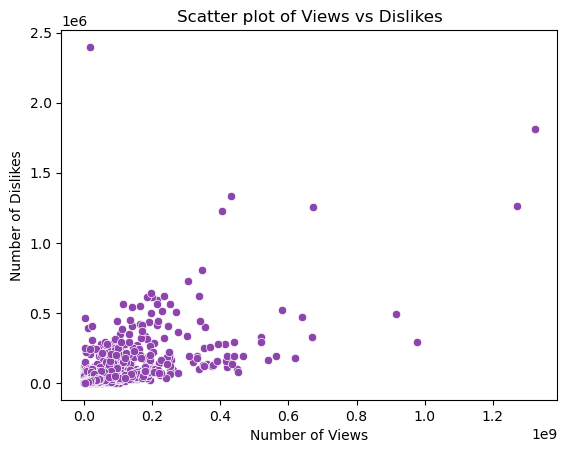

In [36]:
# plot a scatter plot of 'views' and 'dislikes'
sns.scatterplot(data=df, x='view_count', y='dislikes', color='#8E44AD' )

# set the plot title and axis labels
plt.title("Scatter plot of Views vs Dislikes")
plt.xlabel("Number of Views")
plt.ylabel("Number of Dislikes")

# display the plot
plt.show()

<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li>The  positive correlation coefficient is<b><i><font color=#C1063C> 0.684</font></i></b> indicates a moderately strong positive relationship between the number of views and the number of dislikes for the videos in the dataset.</li><br>

<li>Based on the correlation coefficient, we can infer that there is a tendency for <b><i><font color=#C1063C>videos with higher view counts</font></i></b> to also have a <b><i><font color=#C1063C>higher number of dislikes.</font></i></b></li><br> However, it's important to note that correlation does not imply causation. Therefore, we cannot conclude that the number of dislikes directly influences the number of views or vice versa.
<li><b><i><font color=#C1063C>Controversial or polarizing content</font></i></b> tends to generate more views as well as more dislikes.
<li>Videos with a large number of views are more likely to attract a <b><i><font color=#C1063C>wider audience,</font></i></b> including individuals who may have a negative reaction to the content.</li>
                         </body>
    </head>
</html>


-------------------------------------------------------------------------------------------------

<html><span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
            14. Display all the information about the videos that were published in January, and mention the count of videos that were published in January
       </i></b>
    </center>
</span></html>

In [32]:
df.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",Jul
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...,Jun
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...,Sep
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...,Mar
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...,Dec


In [33]:
jan_videos = df[df['published_month'] == 'Jan']
print(jan_videos)


          video_id                                              title  \
27     -2Gwm7QfBnE                                    Q&A With Naisha   
48     -4sfXSHSxzA           SURPRISING BRENT WITH HIS TIKTOK CRUSH!!   
95     -AJD1Fc5rpQ  WE ARE HAVING A BABY! | finding out i'm pregna...   
103    -AuJiwjsmWk              Do Ugly Foods Taste Worse? Taste Test   
182    -JhqO2KWr5U                                   Schlatt gets fit   
...            ...                                                ...   
37300  zmzFL5bG-jc  DEVINE MON PERSONNAGE AVANT AKINATOR ! (c'est ...   
37329  zpzjex7qwrA  Lampard Sacked Within Days Rorys Misery | Chel...   
37345  zqyv-B6mnBM                 Lil Wayne - Ain't Got Time (Audio)   
37383  zwfu1-24T7Q  PRADA Cup Day 1 | Full Race Replay | PRADA Cup...   
37418  zziBybeSAtw  PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...   

                     channel_id       channel_title        published_at  \
27     UCYwNMbogQFzMccPSuy-pPWg           MianTw

In [34]:
jan_videos_count = len(jan_videos)
print("Number of videos published in January:", jan_videos_count)

Number of videos published in January: 2108



<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
                        <li>The information about the videos that were published in the January is displayed by the code -  <b><i><font color=#C1063C>df[df['published_month'] == 'Jan'].</font></i></b></li><br>
            <li>The total number of videos can be display by the command   <b><i><font color=#C1063C>len(jan_videos) </font></i></b></li><br>
            <li>The displayed information and the count of videos published in January can help analyze video  <b><i><font color=#C1063C>trends, patterns,</font></i></b> or usage during that particular month.</li><br>
            <li> It can provide insights into the popularity or frequency of video publishing in January, helps in  informing  <b><i><font color=#C1063C>content strategies, marketing campaigns,</font></i></b> or other related decisions.</li><br>
        </body>
    </head>
</html>

<html>
    <head>
      <b>  
       <center>  <span style="font-family: Algerian; color:#000080;font-size:30px;">Thank you</span></center> 
    <left>
       <span style="font-family: Algerian; color:green;font-size:25px;">By </span><br><br>
        <span style="font-family: Algerian; color:#C1063C;font-size:25px;">Anies Ghousia.J</span> 
           </left>
           </b>
        </head>
    </html>
        

